# PA 2: Classification - Nearest Neighbors

## Student Details (1 Point)

First Student Name and ID: SAI SUMANTH BODA - 1001832348

Second Student Name and ID: MAHESH KOPPALA  - 1001764522



Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

Do not upload the database file [-20 points]


## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.
* Load wine dataset from sklearn datasets. [1 points]'
* while selecting best 3 attributes for training and testing your model. [2 points]
* Find the best K. [3 points]
* Split your dataset 70% for training, and 30% for testing the classifier. [2 points]
* Use Euclidean distance.[3 points]
* Test the classifier with three diferent numbers for neighbors and record the results.[3 points]
* Use comments to explain your code and variable names.[2 points]
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, andsupport) for all three different numbers.[6 points]
* Plot the classifier in a 2D projection.[3 points]

In [121]:
#IPython command to prepare the notebook for matplotlib
%matplotlib inline

#Array Processing
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Data Analysis
import pandas as pd
from pandas import Series, DataFrame

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
import sklearn
from sklearn import metrics,neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#import sklearn.neighbors for knn
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from matplotlib.colors import ListedColormap

#import to transform data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [122]:
#load Titanic Dataset
df= pd.read_csv('titanic.csv',encoding = 'latin1')
df_data = pd.DataFrame(df)
df_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
#Convert strings to numeric

df_data = df_data[df_data != " ?"]
df_data = df_data.dropna()

df_data['Name'] = le.fit_transform(df_data['Name'])
df_data['Sex'] = le.fit_transform(df_data['Sex'])
df_data['Age'] = le.fit_transform(df_data['Age'])
df_data['Ticket'] = le.fit_transform(df_data['Ticket'])
df_data['Fare'] = le.fit_transform(df_data['Fare'])
df_data['Cabin'] = le.fit_transform(df_data['Cabin'])
df_data['Embarked'] = le.fit_transform(df_data['Embarked'])

df_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,49,0,32,1,0,109,57,72,0
3,1,1,70,0,28,1,0,31,44,48,2
6,0,1,112,1,49,0,0,55,41,117,2
10,1,3,148,0,4,1,1,120,10,131,2
11,1,1,27,0,53,0,0,26,17,43,2


In [124]:
df_data = df_data.fillna(0)

df_data['Age'] = df_data['Age'].astype(int)
df_data.loc[ df_data['Age'] <= 10, 'Age'] = 0
df_data.loc[(df_data['Age'] > 10) & (df_data['Age'] <= 25), 'Age'] = 1
df_data.loc[(df_data['Age'] > 25) & (df_data['Age'] <= 35), 'Age'] = 2
df_data.loc[(df_data['Age'] > 35) & (df_data['Age'] <= 45), 'Age'] = 3
df_data.loc[(df_data['Age'] > 45) & (df_data['Age'] <= 55), 'Age'] = 4
df_data.loc[(df_data['Age'] > 55) & (df_data['Age'] <= 65), 'Age'] = 5
df_data.loc[ df_data['Age'] > 65, 'Age'] = 6

df_data.loc[ df_data['Fare'] <= 8, 'Fare'] = 0
df_data.loc[(df_data['Fare'] > 8) & (df_data['Fare'] <= 15), 'Fare'] = 1
df_data.loc[(df_data['Fare'] > 15) & (df_data['Fare'] <= 31), 'Fare']   = 2
df_data.loc[(df_data['Fare'] > 31) & (df_data['Fare'] <= 99), 'Fare']   = 3
df_data.loc[(df_data['Fare'] > 99) & (df_data['Fare'] <= 250), 'Fare']   = 4
df_data.loc[ df_data['Fare'] > 250, 'Fare'] = 5
df_data['Fare'] = df_data['Fare'].astype(int)

df_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,49,0,2,1,0,109,3,72,0
3,1,1,70,0,2,1,0,31,3,48,2
6,0,1,112,1,4,0,0,55,3,117,2
10,1,3,148,0,0,1,1,120,1,131,2
11,1,1,27,0,4,0,0,26,2,43,2


In [125]:
#selecting best 3 attributes for training and testing model
correlation_matrix = df_data.corr()
correlation_matrix ["Survived"].sort_values(ascending = False)

Survived    1.000000
Fare        0.137268
SibSp       0.106346
Parch       0.023582
Ticket      0.022768
Cabin      -0.010664
Pclass     -0.034542
Embarked   -0.100943
Name       -0.149619
Age        -0.272882
Sex        -0.532418
Name: Survived, dtype: float64

In [126]:
#Find the best K.
X1= df_data.drop(columns=['Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Cabin','Embarked'])
y1 = df_data['Embarked']

Best_K = SelectKBest(score_func=chi2, k=1)
fit = Best_K.fit(X1,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)
#concat two dataframes 
Scores = pd.concat([dfcolumns,dfscores],axis=1)
Scores.columns = ['Specs','Score']  #name dataframe columns
print(Scores.nlargest(1,'Score'))

  Specs     Score
0  Fare  7.022172


In [127]:
#Split your dataset 70% for training, and 30% for testing the classifier.
X = df_data.iloc[:,[3,4,8]].values
y = df_data.iloc[:,[0]].values

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3)
print(X_train,X_test,y_train,y_test)

[[1 0 1]
 [1 3 3]
 [0 1 0]
 [1 3 3]
 [0 1 3]
 [1 1 2]
 [0 1 3]
 [1 4 2]
 [1 3 2]
 [1 0 3]
 [1 1 0]
 [1 3 3]
 [0 2 3]
 [0 1 3]
 [0 1 0]
 [0 0 0]
 [0 3 1]
 [0 4 2]
 [1 3 3]
 [1 2 1]
 [0 0 3]
 [1 5 2]
 [1 2 2]
 [0 4 3]
 [0 4 0]
 [0 2 0]
 [1 1 3]
 [0 3 2]
 [1 1 3]
 [0 0 3]
 [1 5 2]
 [1 2 3]
 [1 3 2]
 [1 3 3]
 [0 1 3]
 [0 1 1]
 [0 1 3]
 [1 0 1]
 [0 1 3]
 [0 2 3]
 [1 1 3]
 [0 1 3]
 [0 4 3]
 [1 1 2]
 [1 4 3]
 [1 1 3]
 [1 0 3]
 [0 5 3]
 [0 0 1]
 [0 1 3]
 [1 1 2]
 [1 0 3]
 [1 0 3]
 [1 1 3]
 [1 3 2]
 [1 4 2]
 [1 5 2]
 [0 2 3]
 [0 3 3]
 [1 1 3]
 [0 1 3]
 [1 2 1]
 [1 4 3]
 [1 5 3]
 [1 0 0]
 [1 1 2]
 [0 4 3]
 [0 1 3]
 [0 2 3]
 [0 3 3]
 [1 4 2]
 [0 2 3]
 [1 3 3]
 [0 2 3]
 [0 2 3]
 [1 1 2]
 [1 1 3]
 [1 3 3]
 [1 2 0]
 [0 2 3]
 [1 2 2]
 [1 2 0]
 [0 0 3]
 [0 0 3]
 [1 4 2]
 [1 4 3]
 [0 1 3]
 [1 5 2]
 [0 2 3]
 [1 1 3]
 [1 4 2]
 [0 0 3]
 [0 2 3]
 [0 0 3]
 [1 2 3]
 [1 3 3]
 [0 4 3]
 [0 1 0]
 [0 2 3]
 [0 3 3]
 [1 2 3]
 [0 1 3]
 [1 4 3]
 [0 4 3]
 [0 3 3]
 [1 5 3]
 [1 4 2]
 [1 3 2]
 [0 3 3]
 [0 1 0]
 [1 2 2]
 

c:\users\saisu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


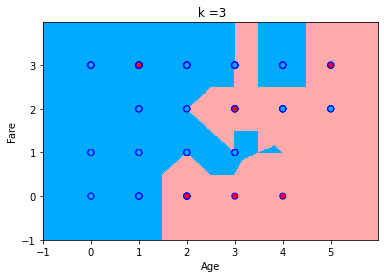

values predicted:
[1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0
 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1]
Confusion Matrix
[[17  5]
 [ 7 26]]
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        22
           1       0.84      0.79      0.81        33

    accuracy                           0.78        55
   macro avg       0.77      0.78      0.78        55
weighted avg       0.79      0.78      0.78        55



In [143]:
#Use Euclidean distance.
#Test the classifier with three diferent numbers for neighbors and record the results.
#Test classifier 1
X = df_data.iloc[:,[4,8]]
y = df_data.iloc[:,[0]].values

h = .02  
    
clf = KNeighborsClassifier(n_neighbors=8,metric='euclidean' )
clf.fit(X, y)

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold, alpha=1.0, edgecolor="blue")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(" k =3")
plt.xlabel("Age")
plt.ylabel("Fare")

plt.show()

#prediction
y_predict = Classifier_Knn.predict (X_test)
print("values predicted:")
print(y_predict)

#Calculate and print the confusion matrix, 
#and the classification Report (includes:precision, recall, f1-score, andsupport) for all three different numbers.
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predict))

#Classification report
print('Classification Report')
print(classification_report(y_test, y_predict))

c:\users\saisu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


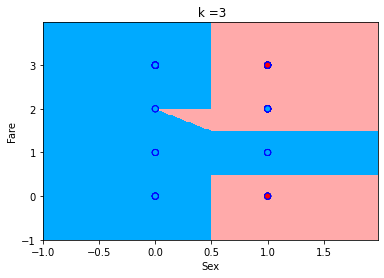

values predicted:
[1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0
 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1]
Confusion Matrix
[[17  5]
 [ 7 26]]
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        22
           1       0.84      0.79      0.81        33

    accuracy                           0.78        55
   macro avg       0.77      0.78      0.78        55
weighted avg       0.79      0.78      0.78        55



In [135]:
#Use Euclidean distance.
#Test the classifier with three diferent numbers for neighbors and record the results.
#Test classifier 2
X = df_data.iloc[:,[3,8]]
y = df_data.iloc[:,[0]].values

h = .02  
    
clf = KNeighborsClassifier(n_neighbors=6,metric='euclidean' )
clf.fit(X, y)
#MINMAX
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold, alpha=1.0, edgecolor="blue")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(" k =3")
plt.xlabel("Sex")
plt.ylabel("Fare")

plt.show()

#prediction
y_predict = Classifier_Knn.predict (X_test)
print("values predicted:")
print(y_predict)

#Calculate and print the confusion matrix, 
#and the classification Report (includes:precision, recall, f1-score, andsupport) for all three different numbers.
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predict))

#Classification report
print('Classification Report')
print(classification_report(y_test, y_predict))

c:\users\saisu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


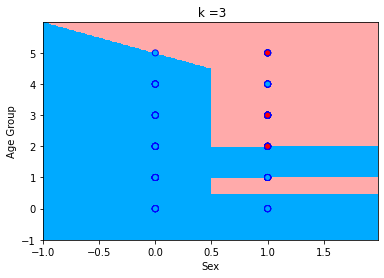

values predicted:
[1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0
 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1]
Confusion Matrix
[[17  5]
 [ 7 26]]
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        22
           1       0.84      0.79      0.81        33

    accuracy                           0.78        55
   macro avg       0.77      0.78      0.78        55
weighted avg       0.79      0.78      0.78        55



In [134]:
#Use Euclidean distance.
#Test the classifier with three diferent numbers for neighbors and record the results.
#Test classifier 3
X = df_data.iloc[:,[3,4]]
y = df_data.iloc[:,[0]].values

h = .02  
    
clf = KNeighborsClassifier(n_neighbors=5,metric='euclidean' )
clf.fit(X, y)


# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
# cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
   
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold, alpha=1.0, edgecolor="blue")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(" k =3")
plt.xlabel("Sex")
plt.ylabel("Age Group")

plt.show()

#prediction
y_predict = Classifier_Knn.predict (X_test)
print("values predicted:")
print(y_predict)

#Calculate and print the confusion matrix, 
#and the classification Report (includes:precision, recall, f1-score, andsupport) for all three different numbers.
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predict))

#Classification report
print('Classification Report')
print(classification_report(y_test, y_predict))

# Report (22 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
* Describe the Nearest Neighbors method. [5 points]
* Explain what was your criteria for selecting the three attributes. [7 points]
* Visualizations of the classifier in a 2D projection, and write your observations. [5 points]
* Interprete and compare the results.[5 points]

Do not to forget to cite your sources!

## <b>Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn<b>